<a href="https://colab.research.google.com/github/AntoniaAcevedo/ADA-Informe/blob/main/Informe11_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del camino mas corto
---


## 1.1 Bellman-Ford (version revisada)
---

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

![imagen](https://www.researchgate.net/publication/282135528/figure/fig7/AS:280570845253639@1443904710246/The-schematic-procedure-of-the-Bellman-Ford-Moore-algorithm-other-related-explanations.png)

## 1.2 Dijkstra (arcos positivos)
---

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-ZKzHQ29pFBLLOx628CHa5v3i1tC5iAgASkoAJoqYf7K1oUmp" width="800" height="400">

# 2. Bellman-Ford y Dijkstra
---
El siguiente código muestra una implementación del algoritmo **Bellman-Ford** y la del algoritmo **Dijkstra**.

##2.1.1 Instancia (entera)
---

In [117]:
from termcolor import colored
import networkx as nx
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

In [119]:
def instance_entero(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_entero(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-20, 100)) # -20 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-20, 100)) # -20 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_entero(n)

    return graph, graph[0][0]

##2.1.2 Instancia (positiva)
---

In [120]:
def instance_pos(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_pos(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_pos(n)

    return graph, graph[0][0]

## 2.2 Codigo
---

#### transfomacion tupla a matriz para utilizacion en algoritmo Dijkstra
---

In [121]:
def matriz (lista, n):
  x= len(lista)
  matriz=[[0 for i in range(n)] for j in range(n)]
  for (u,v,peso) in lista:
    matriz[u][v]= peso
  return matriz

In [122]:
def graph_to_nxdigraph(graph, n):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [123]:
def impresion_gra(list_grafo, n):
  grafo = graph_to_nxdigraph(list_grafo, n)
  ord = nx.shell_layout(grafo)
  labels = nx.get_edge_attributes(grafo,'weight')
  nx.draw_networkx(grafo,ord)
  nx.draw_networkx_edge_labels(grafo,ord,edge_labels=labels)
  plt.show()

### 2.2.1 Bellman-Ford
---

In [124]:
class Graph:
  
    def __init__(self, vertices):
        self.V = vertices 
        self.graph = []

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    def printArr(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))

    def BellmanFord(self, src, verbose=False, visualize=False):
        dist = [float("Inf")] * self.V
        dist[src] = 0
        c=0
        for i in range(self.V - 1):
            for u, v, w in self.graph:
                c+=1
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
            if verbose:
              print("Iteracion", str(i + 1))
              print(colored(f"{str(dist)}", "blue"))
        if verbose:
          print("Busqueda de ciclos negativos")
        for u, v, w in self.graph:
            c+=1
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("El grafo contiene ciclos negativos.")
                return c
            

        self.printArr(dist)
        if visualize:
          impresion_gra(self.graph, self.V)
        return c
 

In [125]:
list_g,raiz = instance_entero(4)
grafo = Graph(4)
for (u,v,peso) in list_g:
  grafo.addEdge(u,v,peso,)

grafo.BellmanFord(raiz)


Vertex Distance from Source
0		9
1		2
2		0
3		5


20

### 2.2.2 Dijkstra
---

In [126]:
class Graph_D():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.lista = []
    def addEdge(self, u, v, w):
        self.lista.append([u, v, w])
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
    def minDistance(self, dist, sptSet):
        min = float("Inf")
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index

    def dijkstra(self, src, verbose=False, visualize=False):
 
        dist = [float("Inf")] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for m in range(self.V):
            u = self.minDistance(dist, sptSet)
            sptSet[u] = True

            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
            if verbose: 
              print("Iteracion", str(m + 1))
              print(colored(f"{str(dist)}", "red"))
 
        self.printSolution(dist)
        if visualize:
          impresion_gra(self.lista, self.V)

In [127]:
list_g,raiz = instance_pos(4)
m= matriz(list_g,4)
grafo = Graph_D(4)
grafo.graph= m
grafo.dijkstra(raiz)

Vertex 	 Distance from Source
0 		 81
1 		 0
2 		 134
3 		 78


##2.3 Descripcion del algoritmo
---


### 2.3.1 Bellman-Ford
---

1. Inicializa un arreglo de distancia en infinito, exceptuando la del nodo inicial que es 0.

2. Se realiza el proceso de relajacion `N-1` veces, donde `N` es la cantidad de nodos.

3. Comprueba la existencia de ciclos negativos.

4. Entrega el camino mas corto entre la posicion inicial y todos los nodos, o un mensaje indicando la presencia de un ciclo negativo. 



### 2.3.2 Dijkstra
---



1. Inicializar todas las distancias en $D$ con un valor infinito relativo, ya que son desconocidas al principio, exceptuando la de $x$  que se debe colocar en $0$ debido a que la distancia de $x$ y $x$ seria $0$.

2. Sea `a=x` (Se toma $a$ como nodo actual).

3. Se recorren todos los nodos adyacentes de $a$, excepto los nodos marcados. Se les llamará nodos no marcados $v_i$.

4. Para el nodo actual, se calcula la distancia tentativa desde dicho nodo hasta sus vecinos con la siguiente fórmula: `dt(vi) = Da + d(a,vi)`. Es decir, la distancia tentativa del nodo $v_i$ es la distancia que actualmente tiene el nodo en el vector D más la distancia desde dicho nodo $a$ (el actual) hasta el nodo vi. Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esta distancia tentativa. Es decir, si `dt(vi) < Dvi → Dvi = dt(vi)`.

5. Se marca como completo el nodo $a$.

6. Se toma como próximo nodo actual el de menor valor en $D$ (puede hacerse almacenando los valores en una cola de prioridad) y se regresa **al paso 3**, mientras existan nodos no marcados.

Una vez terminado al algoritmo, $D$ estará completamente lleno.



##2.4 Ejemplo
---

##2.5.1 Ejecucion paso a paso funcion Bellman-Ford (verbose=True)
---

In [128]:
list_g,raiz = instance_entero(13)
grafo = Graph(13)
for (u,v,peso) in list_g:
  grafo.addEdge(u,v,peso)

grafo.BellmanFord(raiz,True,False)

Iteracion 1
[54, 98, 17, 175, 47, 21, 59, 41, 81, 119, 0, 209, 57]
Iteracion 2
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 3
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 4
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 5
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 6
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 7
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 8
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 9
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 10
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 11
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Iteracion 12
[54, 98, 17, 123, 47, 21, 59, 41, 29, 113, 0, 203, 57]
Busqueda de ciclos negativos
Vertex Distance from Source
0		54
1		98
2		17
3		123
4		47
5		21
6		59
7		41
8		29
9		113
10		0
11		203
12		57


390

##2.5.2 Ejecucion paso a paso funcion Dijkstra (verbose=True)
---

In [129]:
list_g,raiz = instance_pos(13)
m= matriz(list_g,13)
grafo = Graph_D(13)
grafo.graph= m

grafo.dijkstra(raiz,True)

Iteracion 1
[61, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0, 86, inf]
Iteracion 2
[61, inf, inf, inf, 124, inf, inf, 72, 123, inf, 0, 86, inf]
Iteracion 3
[61, inf, inf, inf, 124, 106, inf, 72, 123, inf, 0, 86, 110]
Iteracion 4
[61, inf, inf, inf, 124, 106, inf, 72, 123, 143, 0, 86, 110]
Iteracion 5
[61, inf, inf, inf, 124, 106, 110, 72, 123, 143, 0, 86, 110]
Iteracion 6
[61, inf, 155, inf, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 7
[61, inf, 155, inf, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 8
[61, 201, 155, inf, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 9
[61, 201, 155, inf, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 10
[61, 201, 155, inf, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 11
[61, 201, 155, inf, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 12
[61, 201, 155, 297, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Iteracion 13
[61, 201, 155, 297, 124, 106, 110, 72, 123, 135, 0, 86, 110]
Vertex 	 Distance from Source
0 		 61
1 		 201

## 2.6 Visualizacion 
---

### 2.6.1 Bellman-Ford
---

Vertex Distance from Source
0		0
1		171
2		124
3		81
4		-18
5		155
6		34
7		58
8		86
9		114


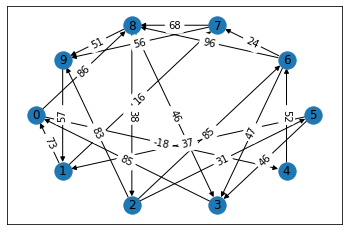

200

In [130]:
list_g,raiz = instance_entero(10)
grafo = Graph(10)
for (u,v,peso) in list_g:
  grafo.addEdge(u,v,peso)

grafo.BellmanFord(raiz,False,True)

### 2.6.2 Dijkstra
---

Vertex 	 Distance from Source
0 		 153
1 		 22
2 		 85
3 		 283
4 		 115
5 		 213
6 		 1
7 		 56
8 		 0
9 		 352


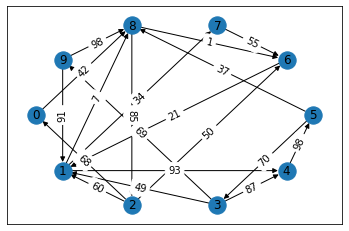

In [131]:
list_g,raiz = instance_pos(10)
m= matriz(list_g,10)
grafo = Graph_D(10)

for (u,v,peso) in list_g:
  grafo.addEdge(u,v,peso)

grafo.graph= m
grafo.dijkstra(raiz,False,True)

#3. Tiempo de ejecución
---

A continuación se analizan los tiempos de ejecució para los algoritmos *Dijkstra* y *Bellman-Ford*

####**`Bellman-Ford`**

#### *Teorema:*  
Para algún grafo de entrada $G = (V,E)$ con $n$ certices y $m$ arcos con valores $\in ℝ$ y un vértice de origen $s$, el algoritmo de `Bellman-Ford` tiene un tiempo de ejecución de $O(|V|\cdot |E|)$

#### *Prueba*

El algoritmo resuelve $n^2$ problemas distintos, donde $n$ es el número de vértices. Si el algoritmo realizara una cantidad constante de trabajo por subproblema, el tiempo de ejecución de este sería $O(n^2)$. Sin embargo, un subproblema tiene un número limitado de candidatos como respuesta.

Se puede definir la cantidad de candidatos para un subproblema como $1 + indeg(v)$ según la fórmula entregada por la función de recurrencia, donde $indeg(v)$ corresponde a la cantidad de arcos que llegan a $v$. 

Para alguna iteración de $i$ tenemos que el trabajo total por cualquier operación realizada por el loop interior es proporcional a:

<center>

$\sum_{v\in V} (1 + indeg(v)) = n + \sum_{v \in V}(indeg(v))$

</center>

Se observa que todos los arcos que llegan a un vértice $v$ para todo $v \in V$ corresponde a todos los arcos del grafo, es decir, $m$.

<center>

$\sum_{v\in V} (1 + indeg(v)) = n + m$

</center>

Por lo tanto, el trabajo realizado por cada loop interno es $O(n+m) = O(m)$, asumiendo que $m ≥ n$

Considerando que el loop exterior de $i$ realiza $n$ iteraciones y el loop interior $m$, tenemos un tiempo de ejecución de $O(n \cdot m)$ <br><br>

*`Dijkstra`*

Tiempo requerido para visitar todos los vertices : $O(V+E)$

Tiempo requerido para proesar un vertice : $O(log V)$

Tiempo requerido para todo el proceso : $O((V+E)log{V})$

#4. Correctitud

---



Se puede probar la correctitud del algoritmo por inducción:

#### **Hipótesis**

Sabiendo que $i$ delimita el tamaño del problema, luego de la $i-ésima$ iteración tenemos que:

1. Si la distancia $L_{s,v}$ no es $+∞$, corresponde al largo de algún camino de $s →v$
2. Si existe un camino $s → v$ con $i$ arcos a lo más, entonces la distancia $L_{s,v}$ es a lo más el menor camino de $L_{s,v}$ con a lo más $i$ vértices 


#### **Prueba**

*Caso base* : 
> Para $i = 0$, la distancia $L_{s,s} = 0$, lo cual es correcto. Para cualquier otra distancia $L_{s,v} = + \infty$, lo que también es correcto pues no hay camino $L_{s,v}$ con 0 arcos.

*Paso inductivo* :
> Supongamos que para todo vértice $w$ con $L_{s,w}$ como camino mínimo de $s → w$ usa a lo más $i - 1$ arcos.
>
> Si $v \neq s$, sea $P$ el camino más corto de $s → v$ con a lo más $i$ arcos,  sea $w$ un vértice justo antes de $v$ en $P$ y $P'$ el camino $s → w$
>
> Por hipotésis inductiva, el valor $L_{P'}$ del camino $P'$ es $L_{i-1, w}$
>
> En la $i-ésima$ iteración se actualiza $L_{i, v} = min(L_{i-1,v}, L_{i-1,w} + l_{w,v})$. Se sabe que $L_{i-1,w} + l_{w,v} = L_{P'} + l_{w,v} = L_P$, lo que muestra que $L_{i,v} ≤ L_P$. Además, $L_{i-1,v}$ es el largo del camino más corto de $s →v$ con a lo más $i-1$ arcos, lo que debe ser al menos tan largo como $L_P$ ya que $P$ tiene más arcos que considerar
>
> El primer caso $L_{i, v} = L_{i-1, v}$ implica que la solución al problema anterior de menor tamaño es un candidato a solución. Este valor puede ser un valor real o bien, en caso de que no exista este camino $L_{i-1, v}$, $=∞$
>
> El segundo caso calcula $L_{i-1,w} + l_{w,v}$ que corresponde al largo de $P'$ más un último arco que conecte a $w$ con el vértice destino $v$. Este valor también puede tomar un real o $+∞$ en caso del que tampoco exista este camino.
>
>  Por inducción, estos cálculos de valores anteriores son realizados correctamente. $L_{i,v}$, dependiente en los resultados de los subproblemas de menor tamaño también será calculado de forma correcta.
>
> Si alguno de estos caminos existen, el mínimo de estos casos corresponderá a $L_{i,v} = P$, que es el camino mínimo de $s → v$ que utiliza a lo más $i$ arcos.
>
> Cuando $i = n$ siendo $n$ la cantidad de vértices dentro del grafo, si $L_{n-1,v} = L_{n,v}$ *(estable)* se habrán calculado todos los caminos mínimos de forma correcta, retornando la lista de todos los largos correspondientes
>
> En el caso contrario, si  $L_{n-1,v} \neq L_{n,v}$ entnces se ha detectado un ciclo negativo, retornando el mensaje correspondiente.
>
> Por lo tanto, el algoritmo de `Bellman-Ford` es correcto



#5. Experimentos
---

Se han truncado las últimas 5000 líneas del flujo de salida.
72		158
73		132
74		170
75		87
76		302
77		245
78		420
79		161
80		257
81		268
82		59
83		116
84		383
85		233
86		304
87		167
88		291
89		299
90		306
91		247
92		421
93		439
94		149
95		94
96		227
Vertex Distance from Source
0		325
1		170
2		402
3		79
4		37
5		329
6		130
7		224
8		287
9		247
10		299
11		330
12		333
13		319
14		223
15		339
16		210
17		360
18		338
19		320
20		202
21		91
22		107
23		75
24		135
25		107
26		255
27		353
28		301
29		125
30		39
31		216
32		146
33		234
34		261
35		219
36		323
37		273
38		282
39		257
40		330
41		183
42		379
43		182
44		130
45		278
46		378
47		131
48		205
49		353
50		221
51		373
52		297
53		212
54		361
55		61
56		227
57		148
58		177
59		129
60		66
61		161
62		316
63		92
64		206
65		243
66		94
67		222
68		23
69		109
70		222
71		267
72		275
73		326
74		302
75		0
76		357
77		361
78		299
79		185
80		269
81		313
82		300
83		367
84		305
85		309
86		279
87		262
88		131
89		300
90		429
91		285


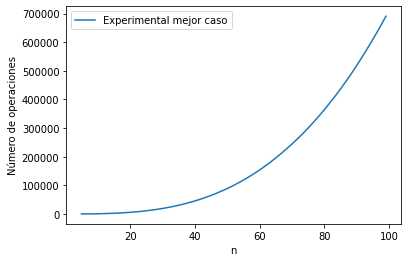

In [132]:
x=[n for n in range(5,100)]

y_prom= []
acm= 0

for n in range(5,100):
  i=0
  while i < 25:
    list_g,raiz = instance_entero(n)
    grafo = Graph(n)
    for (u,v,peso) in list_g:
      grafo.addEdge(u,v,peso)
    c = grafo.BellmanFord(raiz)
    acm+=c
    i+=1
  y_prom.append(acm/25)
    
plt.plot(x,y_prom)
plt.legend(["Experimental mejor caso", "MergeSort"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()


Al resivir estos resultados podemos visualizar que es una funcion cuadratica la cual corresponde a la misma calculada anteriormente de forma teorica de la complejidad temporal.